# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append("../")
import lib.utils as utils
import lib.fiber_solvers as solvers

path_docs = os.path.join("/home", "higorsmonteiro", "Documents")
path_to_fig = os.path.join(path_docs, "library", "0.Research", 
                           "fiber_circuits_project", "texts","homeostasis", 
                           "figs", "numerics")

# Numerical tests on fibers
<br>

Based on the analytical conditions obtained for fibers using the framework of infinitesimal homeostasis, we perform the numerical tests on the following fibers:
1. Feed-forward fiber (FFF) $|n=1, \ell\rangle$ with two input nodes

    1.1 UNSAT-FFF
    
    1.2 SAT-FFF
    
2. Fibonacci circuit on FFF with loop length $d  = 2$

    2.1 Input node $x_1^R$
    
    2.2 Input node $x_2^R$
    
<br>
For all these cases, we consider that all Hill functions are defined with exponent 2:
$$ S(x) = \frac{1}{1+x^2}$$
with the following derivatives:
$$ S'(x) = -\frac{2x}{(1+x^2)^2}  $$

$$ S''(x) = -\frac{2(1-3x^2)}{(1+x^2)^3}  $$

$$ S'''(x) = \frac{24x(1-x²)}{(1+x^2)^4}  $$
<br>

# Feed-forward fiber (FFF) $| n = 1, \ell \rangle$

Here we consider that both the nodes $x_1^R$ and $x_2^R$ are influenced by the input parameter $\mathcal{I}$, although the input received by $x_2^R$ is also related to a symmetry (fibration) breaking parameter $\sigma$.

**Circuit diagram**:

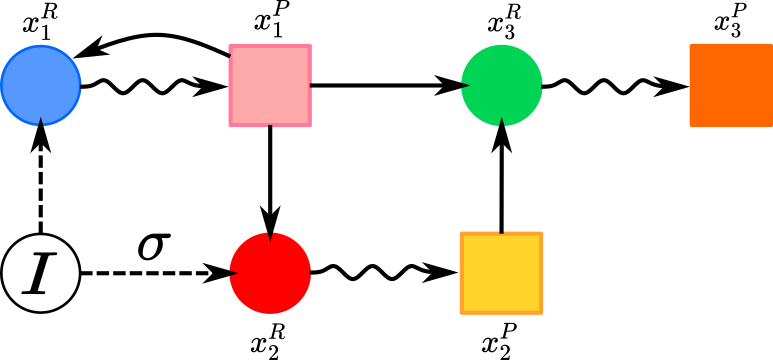

In [2]:
from IPython.display import Image
Image(filename='broken_n1_1.png') 

## UNSAT-FFF: $\tilde{f}(x_1^P) \equiv S(x_1^P) $

### Model parameters

In [6]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
gamma = 1.2
alpha = 0.8
beta = 1.0
sigma = 0.5

# 'delta' is determined following the conditions obtained for the 
# parameters of this specific case.
def find_delta(gamma, alpha, beta, sigma):
    return gamma*beta*(3*np.sqrt(3)/8)*((1-sigma)/(1+sigma))/(alpha)

delta = find_delta(gamma, alpha, beta, sigma)

params = np.array([delta, gamma, alpha, beta, sigma])
initial = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

# Solve the dynamics
res = utils.run_fff_test(params, initial, (1,1), tf=40, npoints_I=300, I_sample=-0.6)
# Main output of the system
sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p = res[2]

### Plots

#### Sample solution

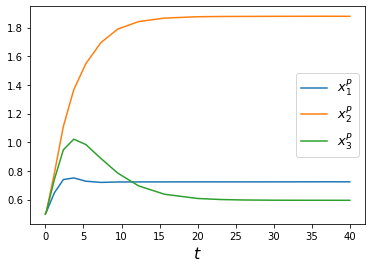

In [7]:
fig_sample, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})

#### Protein concentration on $\mathcal{I}$

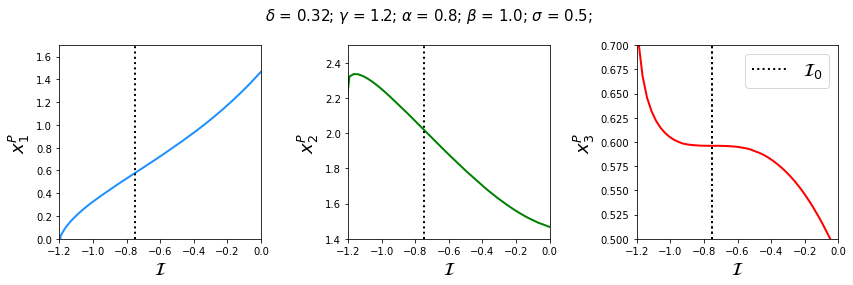

In [14]:
fig_unsat, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
plot_colors = ['dodgerblue', 'green', 'red']
xps = [x1p, x2p, x3p]
for index, axis in enumerate([ax, ax1, ax2]):
    axis.plot(input_range, xps[index], c=plot_colors[index], lw=2)
    axis.set_xlim([-1.2,0])
    axis.fill_between(input_range, -20., 0.0, alpha=0.4)
    axis.axvline(Io, 0, 1, color="black", ls=":", lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

# Custom y-lim   
ax.set_ylim([-0.0,1.7])
ax1.set_ylim([1.4,2.5])
ax2.set_ylim([0.5,0.70])

ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

# Set title
temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig_unsat.suptitle(temp1+temp2, fontsize=15)

# Extra settings
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
# Export
#fig_unsat.savefig(os.path.join(path_to_fig, "unsatfff_twoinput_1.pdf"))

### Extra test for different regulations of $\tilde{g}(x_1^P + x_2^P)$
<br>
We fix the parameters used to obtain the chair above, and change the regulations defining the function $\tilde{g}(x_1^P + x_2^P)$.

$$\begin{aligned} 0. \ \tilde{g}(x_1^P,x_2^P) & = 1 - S(x_1^P + x_2^P) \\ 1. \ \tilde{g}(x_1^P,x_2^P) &= S(x_1^P + x_2^P) \\ 2. \ \tilde{g}(x_1^P,x_2^P) &= (1 - S(x_1^P))S(x_2^P)* \\  \end{aligned} $$

In [15]:
# Obtain the solutions for all cases:
res_0 = utils.run_fff_test(params, initial, (1,0), npoints_I=400)
res_1 = utils.run_fff_test(params, initial, (1,1), npoints_I=400)
res_2 = utils.run_fff_test(params, initial, (1,2), npoints_I=400)

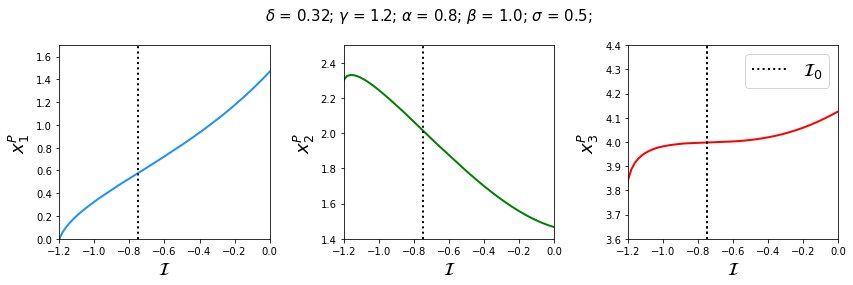

In [18]:
# CASE 0
sample_sol = res_0[0]
input_range = res_0[1]
x1p, x2p, x3p = res_0[2]
Io = res_0[3]

fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
plot_colors = ['dodgerblue', 'green', 'red']
xps = [x1p, x2p, x3p]
for index, axis in enumerate([ax, ax1, ax2]):
    axis.plot(input_range, xps[index], c=plot_colors[index], lw=2)
    axis.set_xlim([-1.2,0])
    axis.fill_between(input_range, -20., 0.0, alpha=0.4)
    axis.axvline(Io, 0, 1, color="black", ls=":", lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

# Custom y-lim
ax.set_ylim([-0.0,1.7])
ax1.set_ylim([1.4,2.5])
ax2.set_ylim([3.6,4.40])

ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

# Set title
temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig.suptitle(temp1+temp2, fontsize=15) 

# Extra settings
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#fig.savefig(os.path.join(path_to_fig, "unsatfff_twoinput_2.pdf"))

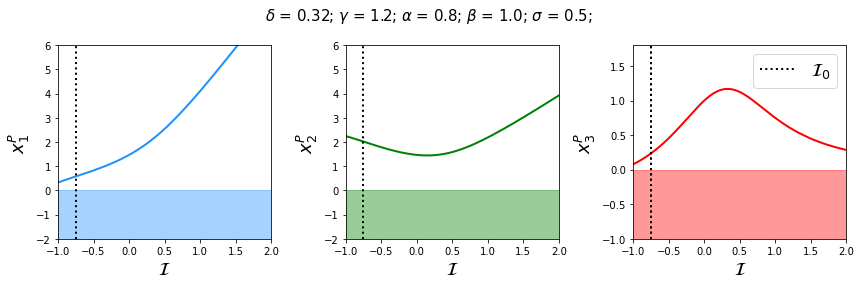

In [23]:
# CASE 2
sample_sol = res_2[0]
input_range = res_2[1]
x1p, x2p, x3p = res_2[2]
Io = res_2[3]

fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
plot_colors = ['dodgerblue', 'green', 'red']
xps = [x1p, x2p, x3p]
for index, axis in enumerate([ax, ax1, ax2]):
    axis.plot(input_range, xps[index], c=plot_colors[index], lw=2)
    axis.set_xlim([-1.0,2.0])
    axis.set_ylim([-2.0,6.0])
    axis.fill_between(input_range, -20., 0.0, alpha=0.4, color=plot_colors[index])
    axis.axvline(Io, 0, 1, color="black", ls=":", lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

# Custom y-lim
ax2.set_ylim([-1.,1.80])

ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

# Set title
temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig.suptitle(temp1+temp2, fontsize=15) 

# Extra settings
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
#fig.savefig(os.path.join(path_to_fig, "unsatfff_twoinput_2.pdf"))

## SAT-FFF: $\tilde{f}(x_1^P) \equiv 1 - S(x_1^P) $

### Model parameters

In [49]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
gamma = 1.0
alpha = 0.28
beta = 1.0
sigma = 2.5

def find_delta(gamma, alpha, beta, sigma):
    return -gamma*beta*(3*np.sqrt(3)/8)*((1-sigma)/(1+sigma))/(alpha)

delta = find_delta(gamma, alpha, beta, sigma)
delta = 0.99

params = np.array([delta, gamma, alpha, beta, sigma])
initial = np.array([1.5, 1.51, 1.51, 1.51, 1.5, 1.5])

res = utils.run_fff_test(params, initial, (0,0), tf=40, I_sample=-0.1875, npoints_I=800, I_factor=2)

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p = res[2]

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
for k in range(len(x1p)):
    if input_range[k]>Io:
        x1p_Io, x2p_Io = x1p[k-1], x2p[k-1]
        break
        
print(Io, I_min, x1p_Io, x2p_Io)

-0.0892857142857143 -0.2845297693545503 2.878194675420733 2.367964026200787


### Plots

#### Sample solution

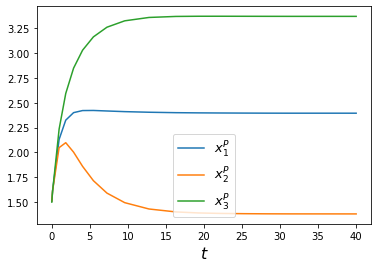

In [50]:
fig_sample, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})

#### Protein concentration on $\mathcal{I}$

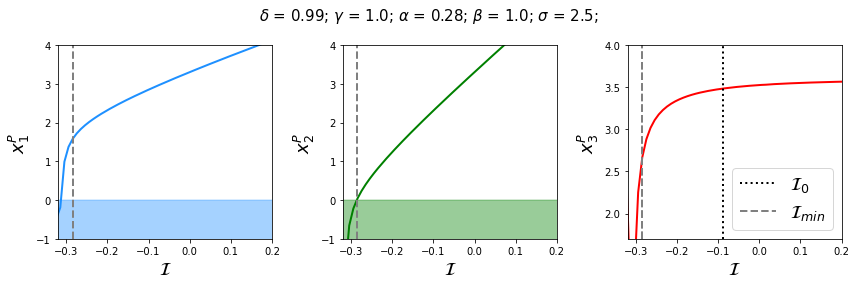

In [67]:
fig_sat, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
plot_colors = ['dodgerblue', 'green', 'red']
xps = [x1p, x2p, x3p]
for index, axis in enumerate([ax, ax1, ax2]):
    axis.plot(input_range, xps[index], c=plot_colors[index], lw=2)
    axis.set_xlim([-0.32,0.2])
    axis.set_ylim([-1,4.0])
    axis.fill_between(input_range, -20., 0.0, alpha=0.4, color=plot_colors[index])
    #axis.axvline(Io, 0, 1, color="black", ls=":", lw=2)
    axis.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

# Custom y-lim   
#ax.set_ylim([-1,6])
#ax1.set_ylim([3,8])
ax2.set_ylim([1.7,4])

ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
ax2.legend(prop={'size':18}, loc=4)

# Set title
temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig_sat.suptitle(temp1+temp2, fontsize=15)

# Extra settings
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
# Export
#fig_sat.savefig(os.path.join(path_to_fig, "unsatfff_twoinput_1.pdf"))

# Single input node $\varphi_2$ Fibonacci circuit

**Circuit diagram 1**:

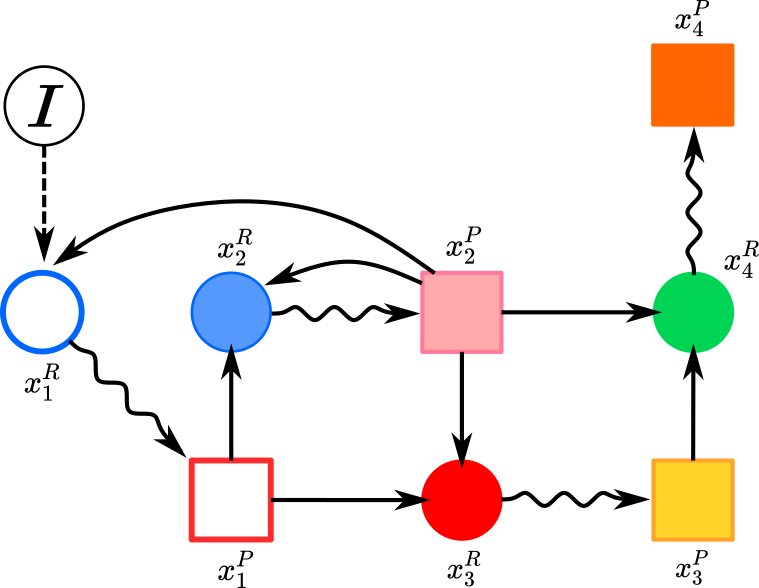

In [3]:
from IPython.display import Image
Image(filename='broken_fibo_2.png') 

**Circuit diagram 2**:

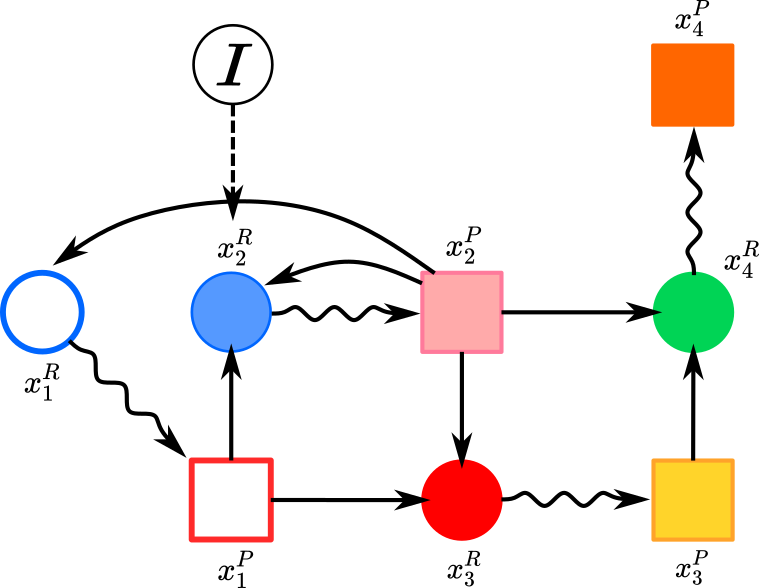

In [4]:
from IPython.display import Image
Image(filename='broken_fibo_1.png') 

## Input node $x_1^R$

In [5]:
# ...

## Input node $x_2^R$

Four special cases to be considered:

1. $\tilde{f}(x_2^P) \equiv S(x_2^P); \  \tilde{g}(x_1^P + x_2^P) \equiv S(x_1^P + x_2^P); $
2. $\tilde{f}(x_2^P) \equiv 1 - S(x_2^P); \  \tilde{g}(x_1^P + x_2^P) \equiv S(x_1^P + x_2^P); $
3. $\tilde{f}(x_2^P) \equiv S(x_2^P); \  \tilde{g}(x_1^P + x_2^P) \equiv 1 - S(x_1^P + x_2^P); $
4. $\tilde{f}(x_2^P) \equiv 1 - S(x_2^P); \  \tilde{g}(x_1^P + x_2^P) \equiv 1 - S(x_1^P + x_2^P); $

In all cases, we consider $\tilde{g}''(x_1^P + x_2^P) = 0$ and $\tilde{f}''(x_2^P) = 0$ in order to satisfy the infinitesimal chair condition. For the following tests, we set $\tilde{h}(x_2^P + x_3^P) \equiv S(x_2^P + x_3^P)$.

### Case 1

#### Model parameters

In [6]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
delta = 1.0
gamma = 0.9
alpha = 0.5
beta = 0.8

params = np.array([delta, gamma, alpha, beta])
initial = np.array([1.2, 1.5, 1.2, 1.5, 1.2, 1.5, 1.2, 1.5])

find_delta = lambda par: (9/4)*(1/(np.sqrt(15)-np.sqrt(3)))*(par[3]*par[1]/par[2]) 
delta = find_delta(params)
params = np.array([delta, gamma, alpha, beta])

print(fr"$\delta$ = {delta}; $\gamma$ = {gamma}; $\alpha$ = {alpha}")
print(fr"$\beta$ = {beta};")

res = utils.run_2fibo_test(params, initial, (1,1,1), tf=40, I_sample=2.0, npoints_I=100, 
                           I_factor=2, input_node=[0.0,1.0,0.0,0.0])

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p, x4p = res[2]
Io = utils.calculate_Io_fibo(params, g="repressor")

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
        
print(Io, I_min, x1p_Io, x2p_Io)

$\delta$ = 1.5133592215195995; $\gamma$ = 0.9; $\alpha$ = 0.5
$\beta$ = 0.8;
-1.169427190999916 -0.46464646464646453 None None


#### Sample solution

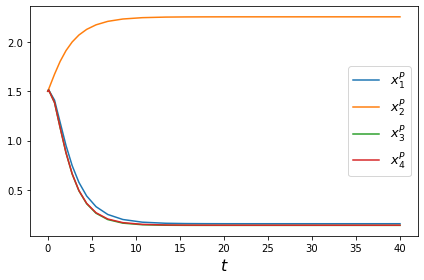

In [7]:
# Sample solution 
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.plot(sample_sol.t, sample_sol.y[7], label=r"$x_4^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})
plt.tight_layout()

#### Protein concentration on $\mathcal{I}$

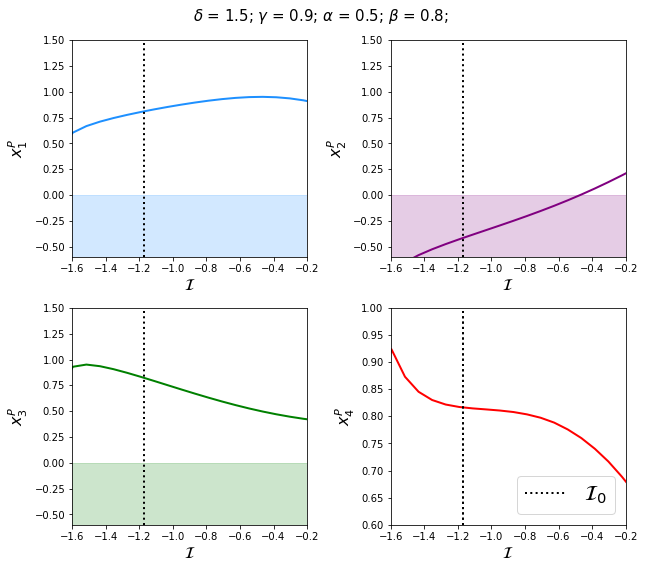

In [9]:
fig_sat, AX = plt.subplots(2,2, figsize=(9,8))
xps = [x1p, x2p, x3p, x4p]
colors = ['dodgerblue', 'purple', 'green', 'red']
for index, axis in enumerate([AX[0,0], AX[0,1], AX[1,0], AX[1,1]]):
    axis.plot(input_range, xps[index], lw=2, c=colors[index])
    axis.fill_between(input_range, -20, 0, alpha=0.2, color=colors[index])
    axis.set_xlim([-1.60,-0.2])
    axis.set_ylim([-0.6,1.5])
    axis.axvline(Io, 0, 1, color="black", ls=':', lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=16)    
    #axis.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)

# Custom y-lim
AX[1,1].set_ylim([0.6,1.0])

AX[1,1].axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
#AX[1,1].axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
AX[1,1].legend(prop={'size':21}, loc=4)


temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2};"
fig_sat.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
fig_sat.savefig(os.path.join(path_to_fig, "fibo_x2r_case1.pdf"))

### Case 2

#### Model parameters

In [10]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
delta = 1.0
gamma = 0.9
alpha = 0.5
beta = 0.8

params = np.array([delta, gamma, alpha, beta])
initial = np.array([1.2, 1.5, 1.2, 1.5, 1.2, 1.5, 1.2, 1.5])

find_delta = lambda par: (9/4)*(1/(np.sqrt(15)-np.sqrt(3)))*(par[3]*par[1]/par[2]) 
delta = find_delta(params)
params = np.array([delta, gamma, alpha, beta])

print(fr"$\delta$ = {delta}; $\gamma$ = {gamma}; $\alpha$ = {alpha}")
print(fr"$\beta$ = {beta};")

res = utils.run_2fibo_test(params, initial, (0,1,1), tf=40, I_sample=2.0, npoints_I=100, 
                           I_factor=2, input_node=[0.0,1.0,0.0,0.0])

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p, x4p = res[2]
#Io = utils.calculate_Io_fibo(params, g="repressor")
Io = params[1]*(((params[2]*params[0])/(params[3]*params[1]))*(1/np.sqrt(3)) - 0.75)

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
        
print(Io, I_min, x1p_Io, x2p_Io)

$\delta$ = 1.5133592215195995; $\gamma$ = 0.9; $\alpha$ = 0.5
$\beta$ = 0.8;
-0.12891352879691048 -0.8686868686868685 None None


#### Sample solution

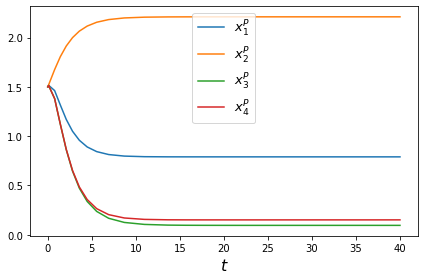

In [11]:
# Sample solution 
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.plot(sample_sol.t, sample_sol.y[7], label=r"$x_4^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})
plt.tight_layout()

#### Protein concentration on $\mathcal{I}$

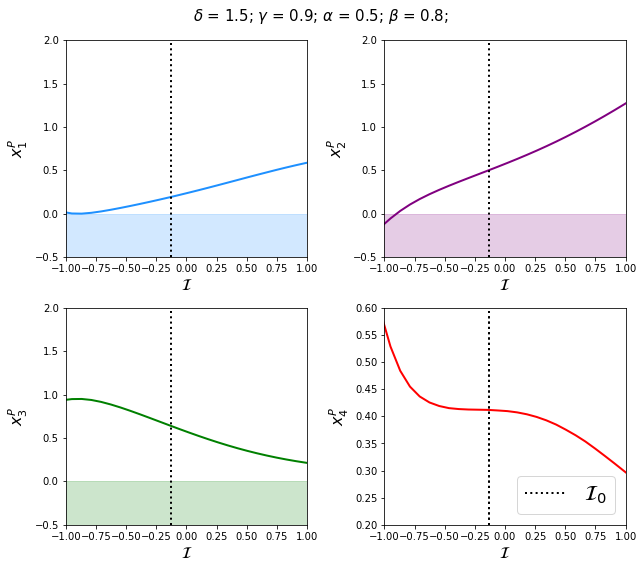

In [12]:
fig_sat, AX = plt.subplots(2,2, figsize=(9,8))
xps = [x1p, x2p, x3p, x4p]
colors = ['dodgerblue', 'purple', 'green', 'red']
for index, axis in enumerate([AX[0,0], AX[0,1], AX[1,0], AX[1,1]]):
    axis.plot(input_range, xps[index], lw=2, c=colors[index])
    axis.fill_between(input_range, -20, 0, alpha=0.2, color=colors[index])
    axis.set_xlim([-1,1])
    axis.set_ylim([-0.5,2])
    axis.axvline(Io, 0, 1, color="black", ls=':', lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=16)    
    #axis.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)

# Custom y-lim
AX[1,1].set_ylim([0.2,0.6])

AX[1,1].axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
#AX[1,1].axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
AX[1,1].legend(prop={'size':21}, loc=4)


temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2};"
fig_sat.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
fig_sat.savefig(os.path.join(path_to_fig, "fibo_x2r_case2.pdf"))

### Case 3

#### Model parameters

In [59]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
delta = 1.0
gamma = 0.9
alpha = 0.5
beta = 0.8

params = np.array([delta, gamma, alpha, beta])
initial = np.array([1.2, 1.5, 1.2, 1.5, 1.2, 1.5, 1.2, 1.5])

find_delta = lambda par: (9/4)*(1/(np.sqrt(15)+np.sqrt(3)))*(par[3]*par[1]/par[2]) 
delta = find_delta(params)
params = np.array([delta, gamma, alpha, beta])

print(fr"$\delta$ = {delta}; $\gamma$ = {gamma}; $\alpha$ = {alpha}")
print(fr"$\beta$ = {beta};")

res = utils.run_2fibo_test(params, initial, (1,0,0), tf=40, I_sample=2.0, npoints_I=400, 
                           I_factor=2, input_node=[0.0,1.0,0.0,0.0])

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p, x4p = res[2]
# Calculate Io depending on the specific case
Io = params[1]*(((params[2]*params[0])/(params[3]*params[1]))*(1/np.sqrt(3)) - 0.25)

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
        
print(Io, I_min, x1p_Io, x2p_Io)

$\delta$ = 0.5780517854324057; $\gamma$ = 0.9; $\alpha$ = 0.5
$\beta$ = 0.8;
-0.01641352879691052 -0.7568922305764412 None None


In [90]:
#### Sample solution

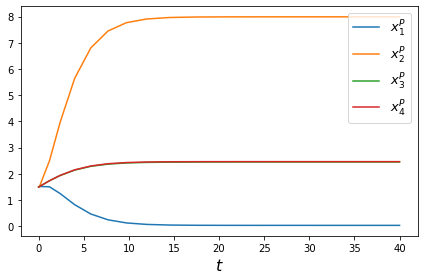

In [60]:
# Sample solution 
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.plot(sample_sol.t, sample_sol.y[7], label=r"$x_4^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})
plt.tight_layout()

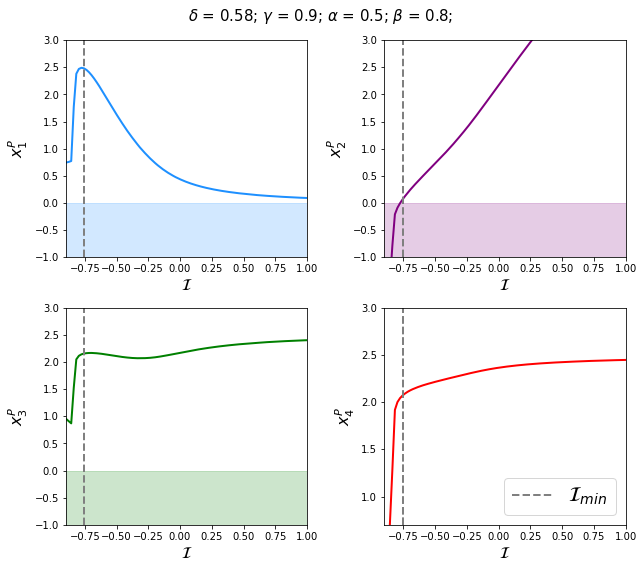

In [61]:
fig_3, AX = plt.subplots(2,2, figsize=(9,8))
xps = [x1p, x2p, x3p, x4p]
colors = ['dodgerblue', 'purple', 'green', 'red']
for index, axis in enumerate([AX[0,0], AX[0,1], AX[1,0], AX[1,1]]):
    axis.plot(input_range, xps[index], lw=2, c=colors[index])
    axis.fill_between(input_range, -20, 0, alpha=0.2, color=colors[index])
    axis.set_xlim([-0.9,1])
    axis.set_ylim([-1,3])
    #axis.axvline(Io, 0, 1, color="black", ls=':', lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=16)    
    axis.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)

# Custom y-lim
AX[1,1].set_ylim([0.7,3])

#AX[1,1].axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
AX[1,1].axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
AX[1,1].legend(prop={'size':20}, loc=4)


temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2};"
fig_3.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
fig_3.savefig(os.path.join(path_to_fig, "fibo_x2r_case3.pdf"))

In [50]:
# Plot derivatives of h

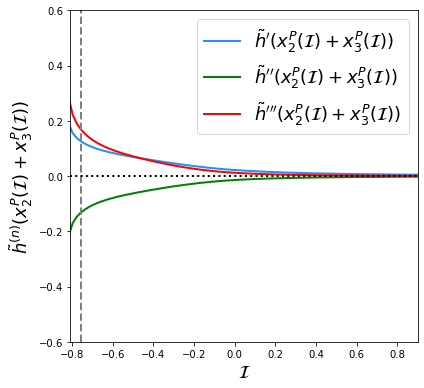

In [63]:
h1_prime = -utils.S_prime1(x2p, x3p, 2)
h2_prime = -utils.S_prime2(x2p, x3p, 2)
h3_prime = -utils.S_prime3(x2p, x3p, 2)

fig_h, AX = plt.subplots(1, figsize=(6,5.5))
colors = ['dodgerblue', 'green', 'red']

AX.plot(input_range, h1_prime, lw=2, c=colors[0], label=r"$\tilde{h}'(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$")
AX.plot(input_range, h2_prime, lw=2, c=colors[1], label=r"$\tilde{h}''(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$")
AX.plot(input_range, h3_prime, lw=2, c=colors[2], label=r"$\tilde{h}'''(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$")
AX.set_xlim([-0.81, 0.9])
AX.set_ylim([-0.6, 0.6])
AX.set_xlabel(r"$\mathcal{I}$", fontsize=18)
AX.set_ylabel(r"$\tilde{h}^{(n)}(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$", fontsize=18)
AX.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
AX.axhline(0, 0, 1, color="black", ls=':', lw=2)
AX.legend(prop={'size':18})
plt.tight_layout()
fig_h.savefig(os.path.join(path_to_fig, "fibo_x2r_case3_h_derivative.pdf"))

### Case 4

#### Model parameters

In [41]:
# Set parameters gamma, alpha, beta and sigma to find delta. 
delta = 1.0
gamma = 0.9
alpha = 0.5
beta = 0.8

params = np.array([delta, gamma, alpha, beta])
initial = np.array([1.2, 1.5, 1.2, 1.5, 1.2, 1.5, 1.2, 1.5])

find_delta = lambda par: (9/4)*(1/(np.sqrt(15)+np.sqrt(3)))*(par[3]*par[1]/par[2]) 
delta = find_delta(params)
params = np.array([delta, gamma, alpha, beta])

print(fr"$\delta$ = {delta}; $\gamma$ = {gamma}; $\alpha$ = {alpha}")
print(fr"$\beta$ = {beta};")

res = utils.run_2fibo_test(params, initial, (0,0,0), tf=40, I_sample=2.0, npoints_I=1400, 
                           I_factor=2, input_node=[0.0,1.0,0.0,0.0])

sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p, x4p = res[2]
# Calculate Io depending on the specific case
Io = -params[1]*(((params[2]*params[0])/(params[3]*params[1]))*(1/np.sqrt(3)) + 0.25)

I_min, x1p_Io, x2p_Io = None, None, None
for k in range(len(x1p)):
    if x1p[k]>=0.0 and x2p[k]>=0.0 and x3p[k]>=0.0:
        I_min = input_range[k]
        break
        
print(Io, I_min, x1p_Io, x2p_Io)

$\delta$ = 0.5780517854324057; $\gamma$ = 0.9; $\alpha$ = 0.5
$\beta$ = 0.8;
-0.43358647120308946 -0.42744817726947826 None None


In [23]:
#### Sample solution

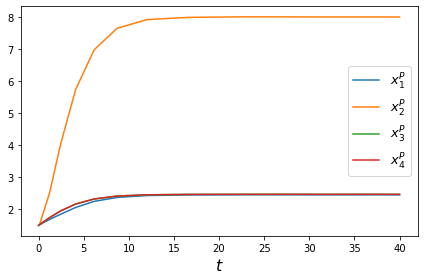

In [42]:
fig_sol, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.plot(sample_sol.t, sample_sol.y[7], label=r"$x_4^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})
plt.tight_layout()

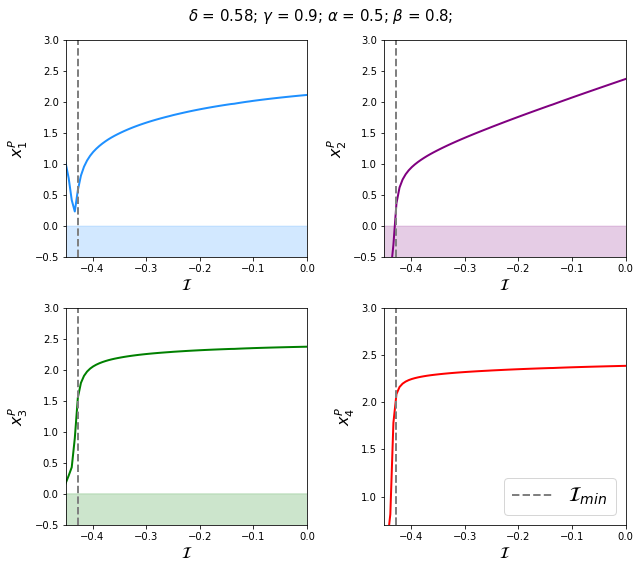

In [43]:
fig_3, AX = plt.subplots(2,2, figsize=(9,8))
xps = [x1p, x2p, x3p, x4p]
colors = ['dodgerblue', 'purple', 'green', 'red']
for index, axis in enumerate([AX[0,0], AX[0,1], AX[1,0], AX[1,1]]):
    axis.plot(input_range, xps[index], lw=2, c=colors[index])
    axis.fill_between(input_range, -20, 0, alpha=0.2, color=colors[index])
    axis.set_xlim([-0.45,0])
    axis.set_ylim([-0.5,3])
    #axis.axvline(Io, 0, 1, color="black", ls=':', lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=16)    
    axis.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)

# Custom y-lim
AX[1,1].set_ylim([0.7,3])

#AX[1,1].axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
AX[1,1].axvline(I_min, 0, 1, color="gray", ls='--', lw=2, label=r"$\mathcal{I}_{min}$")
AX[1,1].legend(prop={'size':20}, loc=4)


temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2};"
fig_3.suptitle(temp1+temp2, fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
fig_3.savefig(os.path.join(path_to_fig, "fibo_x2r_case4.pdf"))

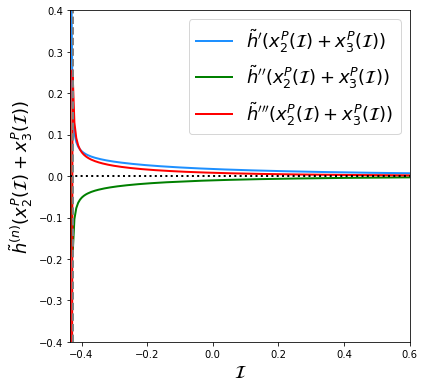

In [58]:
h1_prime = -utils.S_prime1(x2p, x3p, 2)
h2_prime = -utils.S_prime2(x2p, x3p, 2)
h3_prime = -utils.S_prime3(x2p, x3p, 2)

fig_h, AX = plt.subplots(1, figsize=(6,5.5))
colors = ['dodgerblue', 'green', 'red']

AX.plot(input_range, h1_prime, lw=2, c=colors[0], label=r"$\tilde{h}'(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$")
AX.plot(input_range, h2_prime, lw=2, c=colors[1], label=r"$\tilde{h}''(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$")
AX.plot(input_range, h3_prime, lw=2, c=colors[2], label=r"$\tilde{h}'''(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$")
AX.set_xlim([-0.435, 0.6])
AX.set_ylim([-0.4, 0.4])
AX.set_xlabel(r"$\mathcal{I}$", fontsize=18)
AX.set_ylabel(r"$\tilde{h}^{(n)}(x_2^P(\mathcal{I}) + x_3^P(\mathcal{I}))$", fontsize=18)
AX.axvline(I_min, 0, 1, color="gray", ls='--', lw=2)
AX.axhline(0, 0, 1, color="black", ls=':', lw=2)
AX.legend(prop={'size':18})
plt.tight_layout()
fig_h.savefig(os.path.join(path_to_fig, "fibo_x2r_case4_h_derivative.pdf"))